In this post, I generate a similar travel map using Cartopy. We will start by importing the required libraries, and then proceed to build up our desired map from a [given example](http://scitools.org.uk/cartopy/docs/v0.5/matplotlib/introductory_examples/01.great_circle.html). At each step, I re-import libraries so the code from that cell can be re-run on its own (see [this thread](https://twitter.com/jakevdp/status/978665789598257152) for a discussion). 

In [1]:
%matplotlib inline
import matplotlib
import cartopy
import pandas as pd

In [2]:
%load_ext watermark
%watermark -iv

matplotlib  2.2.2
cartopy     0.16.0
pandas      0.22.0



We start with a simple example from the Cartopy documentation to plot a ground track between two points.

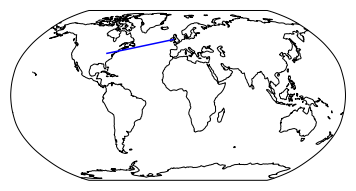

In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines()

# [lng1, lng2], [lat1, lat2]
plt.plot([-6.26, -82.99], [53.35, 39.96], color='blue', 
         transform=ccrs.PlateCarree())

Switching from the `PlateCarree` transformation to the `Geodetic` transformation, we can instead plot a great circle between to points.

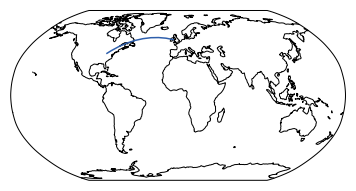

In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines()

# [lng1, lng2], [lat1, lat2]
plt.plot([-6.26, -82.99], [53.35, 39.96], color='#2E5FAC',  
         transform=ccrs.Geodetic())

Next we shade the land and water areas. Note that the water defaults to white so line 12 to specify white water is redundant, but I leave this in should you choose to use a different color. I will later remove this when increasing the resolution of the coastlines.

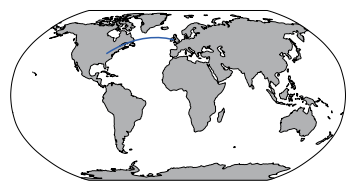

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy

ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines()

# color land and water
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='#7f7f7f', 
               facecolor='#B1B2B4')
ax.add_feature(cartopy.feature.OCEAN, zorder=0, facecolor='white')

# [lng1, lng2], [lat1, lat2]
plt.plot([-6.26, -82.99], [53.35, 39.96], color='#2E5FAC',  
         transform=ccrs.Geodetic())

Next we use `set_extent` to zoom in on the area of interest.

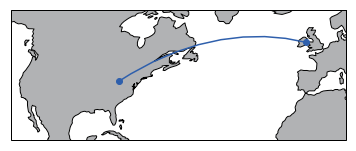

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy

ax = plt.axes(projection=ccrs.Robinson())

ax.set_global()
ax.coastlines()

# [lon_min, lon_max, lat_min, lat_max]
ax.set_extent([-120, 10, 20, 65], crs=ccrs.PlateCarree())

# color land and water
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='#7f7f7f', 
               facecolor='#B1B2B4')
ax.add_feature(cartopy.feature.OCEAN, zorder=0, facecolor='white')

# [lon1, lon2], [lat1, lat2]
plt.plot([-6.26, -82.99], [53.35, 39.96], color='#2E5FAC', marker='o',
         transform=ccrs.Geodetic())

Next we add country and state borders.

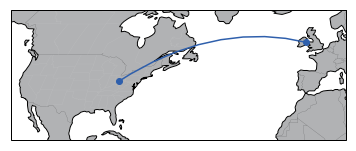

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy

ax = plt.axes(projection=ccrs.Robinson())

ax.set_global()
ax.coastlines()

# [lon_min, lon_max, lat_min, lat_max]
ax.set_extent([-120, 10, 20, 65], crs=ccrs.PlateCarree())

# color land and water
ax.add_feature(cartopy.feature.LAND, zorder=0, 
               edgecolor='#7f7f7f', facecolor='#B1B2B4')
ax.add_feature(cartopy.feature.OCEAN, zorder=0, facecolor='white')

# country borders
ax.add_feature(cartopy.feature.BORDERS, zorder=0, 
               edgecolor='#000000', linewidth=.1)

# state borders
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none', linewidth=.1)
ax.add_feature(states_provinces, edgecolor='#D3D3D3')

# [lon1, lon2], [lat1, lat2]
plt.plot([-6.26, -82.99], [53.35, 39.96], color='#2E5FAC', 
         marker='o', transform=ccrs.Geodetic())

Finally, we wrap this all up in a function, add lakes, increase the resolution of the land and coastlines, and load some data into a DataFrame to generate the plot.

In [8]:
def plot_great_circles(df,fname):
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    import cartopy

    ax = plt.axes(projection=ccrs.Robinson())

    ax.set_global()
    ax.add_feature(cfeature.LAKES, facecolor='white', 
                   edgecolor='black', linewidth=.1)
    ax.coastlines('50m', linewidth=0.2)

    # [lon_min, lon_max, lat_min, lat_max]
    ax.set_extent([-120, 10, 20, 65], crs=ccrs.PlateCarree())

    # add and color high-resolution land
    LAND_highres = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                                edgecolor='white',
                                                facecolor='#B1B2B',
                                                linewidth=.1
                                               )
    ax.add_feature(LAND_highres, zorder=0, 
                   edgecolor='#7f7f7f', facecolor='#B1B2B4')

    # add country borders
    ax.add_feature(cartopy.feature.BORDERS, zorder=0, 
                   edgecolor='#000000', linewidth=.1)

    # add state borders
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m', 
        zorder=1,
        facecolor='none', 
        linewidth=.1)
    ax.add_feature(states_provinces, edgecolor='#D3D3D3')

    # plot all great circles
    for row in range(df.shape[0]):
        Lat_Orig = df.loc[df.index[row],'Lat_Orig']
        Lng_Orig = df.loc[df.index[row],'Lng_Orig']
        Lat_Des = df.loc[df.index[row],'Lat_Des']
        Lng_Des = df.loc[df.index[row],'Lng_Des']
        plt.plot([Lng_Orig, Lng_Des], [Lat_Orig, Lat_Des], 
                 color='#2E5FAC', linewidth=.5,
                 marker='o', markerfacecolor='#CF5300',
                 markeredgecolor='#CF5300', markersize=1,
                 transform=ccrs.Geodetic())
    
    plt.savefig(fname,bbox_inches='tight', dpi=300)

In [9]:
df = pd.read_csv('2018_travel.csv')
df.head()

,Name_Orig,Lat_Orig,Lng_Orig,Name_Des,Lat_Des,Lng_Des
0,"Columbus, OH",39.961,-82.999,"Orlando, FL",28.538,-81.379
1,"Orlando, FL",28.538,-81.379,"Port Orange, FL",29.138,-80.995
2,"Port Orange, FL",29.138,-80.995,KSC,28.573,-80.649
3,KSC,28.573,-80.649,"Orlando, FL",28.538,-81.379
4,"Columbus, OH",39.961,-82.999,"Phoenix, AZ",33.448,-112.074


And here is our final plot:

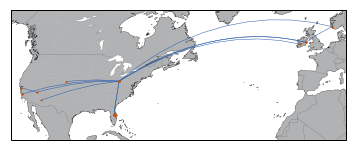

In [10]:
plot_great_circles(df,fname='2018_Travel.png')

## Closing Thoughts
Cartopy continues to be actively developed and I plan to use it for future cartographic plotting in Python. Also take a look at this [great example](https://uoftcoders.github.io/studyGroup/lessons/python/cartography/lesson/) of using Cartopy.